In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
Nclass = 1000
D = 2 # dimensionality of input
M = 9 # hidden layer size
K = 2 # number of classes

In [20]:
R_inner = 5
R_outer = 10

# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)

R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([ X_inner, X_outer ])
Y = np.array([0]*(N//2) + [1]*(N//2)) # labels: first 50 are 0, last 50 are 1

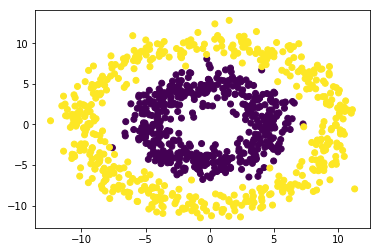

In [21]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [22]:
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

In [23]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [24]:
def cost(T, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return dot_T_Y.sum()

In [25]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [26]:
def derivative_w2(Z, T, Y):
    return Z.T.dot(T - Y)

In [27]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

In [28]:
def derivative_w1(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)
    return ret2

In [29]:
def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

('cost:', -819.7304852418777, 'classification_rate:', 0.495)
('cost:', -606.9590731334498, 'classification_rate:', 0.621)
('cost:', -347.57808900911033, 'classification_rate:', 0.812)
('cost:', -129.21095324769016, 'classification_rate:', 0.966)
('cost:', -79.81543803535448, 'classification_rate:', 0.993)
('cost:', -61.48610001698708, 'classification_rate:', 0.992)
('cost:', -50.81888068737428, 'classification_rate:', 0.993)
('cost:', -44.57090686329329, 'classification_rate:', 0.994)
('cost:', -40.34456174014518, 'classification_rate:', 0.994)
('cost:', -36.90647213299961, 'classification_rate:', 0.994)


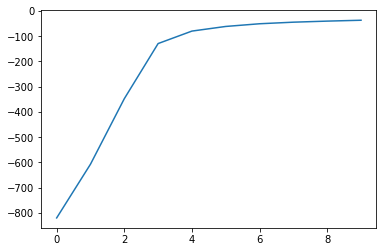

In [42]:
# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

learning_rate = 1e-3
costs = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)

plt.plot(costs)
plt.show()